# ACF AND PACF

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import statsmodels.api as sm

# Load a non-stationary dataset
df1 = pd.read_csv('Airlines+Data.csv',index_col='Month',parse_dates=True)
df1.index.freq = 'MS'

# Load a stationary dataset
df2 = pd.read_csv('CocaCola_Sales_Rawdata.csv',index_col='Quarter',parse_dates=True)
df2.index.freq = 'Q'

In [2]:
# Import the models we'll be using in this section
from statsmodels.tsa.stattools import acovf,acf,pacf,pacf_yw,pacf_ols

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.DataFrame({'a':[13, 5, 11, 12, 9]})
df

,a
0,13
1,5
2,11
3,12
4,9


In [5]:
arr3 = acf(df['a'])
arr3

array([ 1.   , -0.5  , -0.2  ,  0.275, -0.075])

In [6]:
arr4 = pacf_yw(df['a'],nlags=4,method='mle')
arr4

array([ 1.        , -0.5       , -0.6       , -0.38541667, -0.40563273])

In [7]:
arr5 = pacf_yw(df['a'],nlags=4,method='unbiased')
arr5

array([ 1.        , -0.625     , -1.18803419,  2.03764205,  0.8949589 ])

In [8]:
arr6 = pacf_ols(df['a'],nlags=4)
arr6

array([ 1.        , -0.49677419, -0.43181818,  0.53082621,  0.25434783])

# Plotting

# ACF Plots

In [9]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [10]:
acf(df2['Sales'])

array([ 1.        ,  0.81412378,  0.72575256,  0.74704325,  0.74447284,
        0.56259622,  0.48431574,  0.47570095,  0.45093931,  0.2983646 ,
        0.23362729,  0.22856201,  0.21748174,  0.0766817 ,  0.0203412 ,
        0.01080073, -0.01281192, -0.1386611 , -0.18373254, -0.18110606,
       -0.20101581, -0.29758432, -0.3248813 , -0.311924  , -0.31786316,
       -0.39278546, -0.39004066, -0.3634021 , -0.34616641, -0.39415387,
       -0.36914039, -0.32972137, -0.30751941, -0.34545683, -0.30655706,
       -0.24583679, -0.21122465, -0.22342542, -0.14907989, -0.0924574 ,
       -0.08170299])

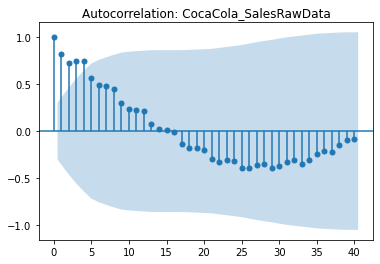

In [11]:
title = 'Autocorrelation: CocaCola_SalesRawData'
lags = 40
plot_acf(df2,title=title,lags=lags);

In [12]:
acf(df1['Passengers'])

array([ 1.        ,  0.92817479,  0.8377003 ,  0.75912683,  0.69001805,
        0.64007997,  0.5983407 ,  0.56046942,  0.54403515,  0.5554825 ,
        0.57512705,  0.61319803,  0.62794784,  0.56221853,  0.48481096,
        0.41842954,  0.35727781,  0.31071555,  0.26844553,  0.23812834,
        0.22509805,  0.23687594,  0.25427876,  0.28281484,  0.29370769,
        0.24539841,  0.18613412,  0.14165985,  0.09862367,  0.06400382,
        0.03079153,  0.00923044,  0.00151405,  0.01519006,  0.03257838,
        0.05911755,  0.0711796 ,  0.03572558, -0.00750988, -0.04132627,
       -0.07356355])

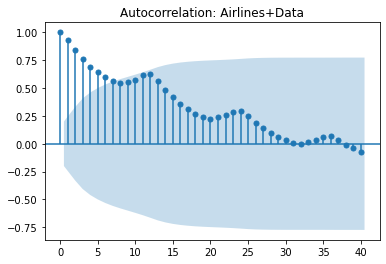

In [13]:
title = 'Autocorrelation: Airlines+Data'
lags = 40
plot_acf(df1,title=title,lags=lags);

# PACF Plots

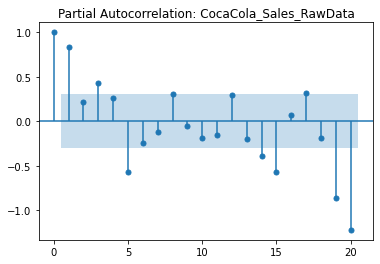

In [14]:
title='Partial Autocorrelation: CocaCola_Sales_RawData'
lags=20
plot_pacf(df2,title=title,lags=lags);

To make the Airline Passengers data stationary, we'll first apply differencing:

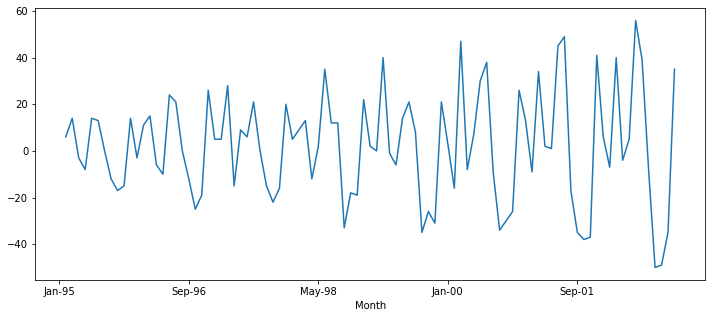

In [15]:
from statsmodels.tsa.statespace.tools import diff

df1['d1'] = diff(df1['Passengers'],k_diff=1)
df1['d1'].plot(figsize=(12,5));

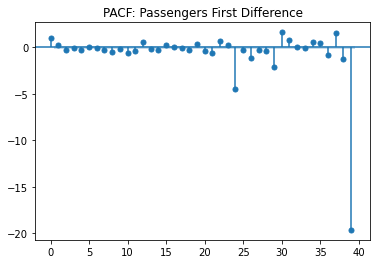

In [16]:
title='PACF: Passengers First Difference'
lags=40
plot_pacf(df1['d1'].dropna(),title=title,lags=np.arange(lags));  # be sure to add .dropna() here!

# Plot Resizing
In case you want to display the full autocorrelation plot, it helps to increase the figure size using matplotlib

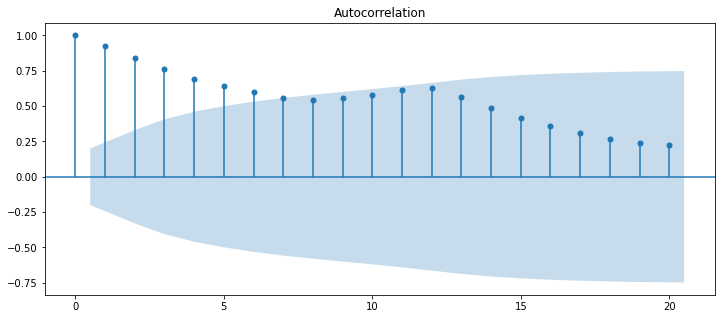

In [17]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,5))

plot_acf(df1['Passengers'],ax=ax);

# ARIMA

# Augmented Dickey Fuller Test

In [18]:
from statsmodels.tsa.stattools import adfuller
def adf_test(series):    
    result = adfuller(series.dropna())  
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)
    #for key,val in result[4].items():
        #out[f'critical value ({key})']=val
    if result[1] <= 0.05:
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("Fail to reject the null hypothesis")
        print("Data is non-stationary")

In [19]:
# Load datasets
df1 = pd.read_csv('CocaCola_Sales_RawData.csv',index_col='Quarter',parse_dates=True)
df1.index.freq = 'Q'
df1 = df1[:120]  # we only want the first four months
df1

,Sales
Quarter,
Q1_86,1734.827000
Q2_86,2244.960999
Q3_86,2533.804993
Q4_86,2154.962997
Q1_87,1547.818996
Q2_87,2104.411995
Q3_87,2014.362999
Q4_87,1991.746998
Q1_88,1869.049999


In [20]:
df2 = pd.read_csv('Airlines+Data.csv',index_col='Month',parse_dates=True)
df2.index.freq='MS'
df2

,Passengers
Month,
Jan-95,112
Feb-95,118
Mar-95,132
Apr-95,129
May-95,121
...,...
Aug-02,405
Sep-02,355
Oct-02,306


# EDA

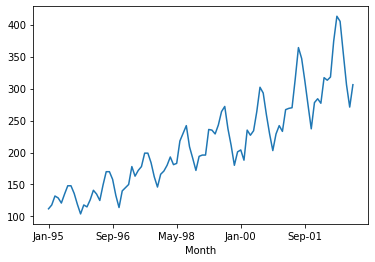

In [21]:
df2['Passengers'].plot()
plt.show()

# Forecasting_Model_based Method

In [22]:
Walmart = pd.read_csv("Airlines+Data.csv")

In [23]:
Walmart

,Month,Passengers
0,Jan-95,112
1,Feb-95,118
2,Mar-95,132
3,Apr-95,129
4,May-95,121
...,...,...
91,Aug-02,405
92,Sep-02,355
93,Oct-02,306
94,Nov-02,271


In [24]:
Walmart["Date"] = pd.to_datetime(Walmart.Month,format="%b-%y")
#look for c standard format codes

# Extracting Day, weekday name, month name, year from the Date column using 
# Date functions from pandas 

Walmart["month"] = Walmart.Date.dt.strftime("%b") # month extraction
Walmart["year"] = Walmart.Date.dt.strftime("%Y") # year extraction

#Walmart["Day"] = Walmart.Date.dt.strftime("%d") # Day extraction
#Walmart["wkday"] = Walmart.Date.dt.strftime("%A") # weekday extraction

<AxesSubplot:xlabel='month', ylabel='year'>

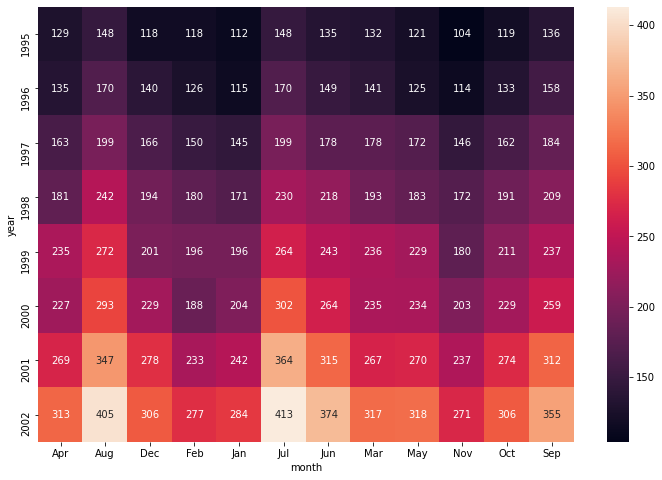

In [25]:
import seaborn as sns
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=Walmart,values="Passengers",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g") #fmt is format of the grid values


<AxesSubplot:xlabel='year', ylabel='Passengers'>

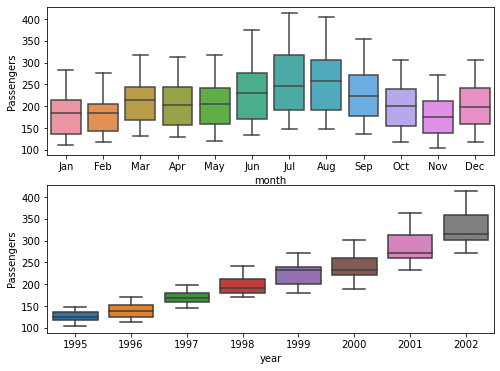

In [26]:
# Boxplot for ever
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="month",y="Passengers",data=Walmart)
plt.subplot(212)
sns.boxplot(x="year",y="Passengers",data=Walmart)


<AxesSubplot:xlabel='year', ylabel='Passengers'>

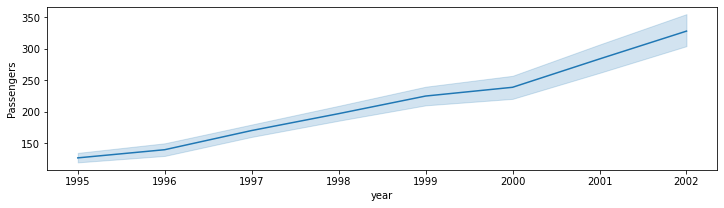

In [27]:
plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="Passengers",data=Walmart)

# Splitting Data

In [28]:
Train = Walmart.head(147)
Test = Walmart.tail(12)

In [29]:
#Linear Model
import statsmodels.formula.api as smf 

linear_model = smf.ols('Passengers~Month',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['Month'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))
rmse_linear

1.8346134549116834e-13

In [30]:
#Exponential

Exp = smf.ols('Passengers~Month',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['Month'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp


inf

In [31]:
#Compare the results 

data = {"MODEL":pd.Series(["Month","Passengers"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
0,Month,1.834613e-13
1,Passengers,inf


# Transformations

In [32]:
# load and plot a time series
from pandas import read_csv
from matplotlib import pyplot

In [33]:
series = read_csv('Airlines+Data.csv', header=0, index_col=0, parse_dates=True)

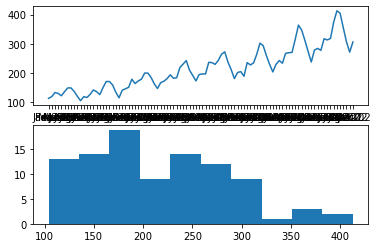

In [34]:
# line plot
pyplot.subplot(211)
pyplot.plot(series)
# histogram
pyplot.subplot(212)
pyplot.hist(series)
pyplot.show()

# Square Root Transform

In [35]:
from pandas import read_csv
from pandas import DataFrame
from numpy import sqrt
from matplotlib import pyplot

In [36]:
dataframe = DataFrame(series.values)
dataframe.columns = ['passengers']
dataframe['passengers'] = sqrt(dataframe['passengers'])

<function matplotlib.pyplot.show(close=None, block=None)>

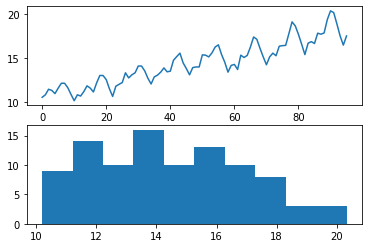

In [37]:
# line plot
pyplot.subplot(211)
pyplot.plot(dataframe['passengers'])
# histogram
pyplot.subplot(212)
pyplot.hist(dataframe['passengers'])
pyplot.show

# Log Transform

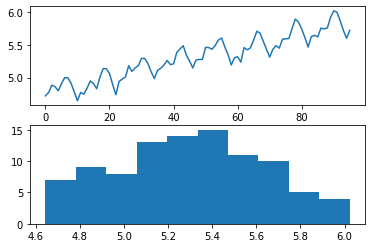

In [38]:
from numpy import log
dataframe = DataFrame(series.values)
dataframe.columns = ['passengers']
dataframe['passengers'] = log(dataframe['passengers'])

# line plot
pyplot.subplot(211)
pyplot.plot(dataframe['passengers'])
# histogram
pyplot.subplot(212)
pyplot.hist(dataframe['passengers'])
pyplot.show()

# Model_Arima

In [39]:
# Import libraries
from pandas import read_csv
from matplotlib import pyplot
from numpy import sqrt
import warnings
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [40]:
series = read_csv('CocaCola_Sales_RawData.csv', header=0, index_col=0, parse_dates=True)

In [41]:
series

,Sales
Quarter,
Q1_86,1734.827000
Q2_86,2244.960999
Q3_86,2533.804993
Q4_86,2154.962997
Q1_87,1547.818996
Q2_87,2104.411995
Q3_87,2014.362999
Q4_87,1991.746998
Q1_88,1869.049999


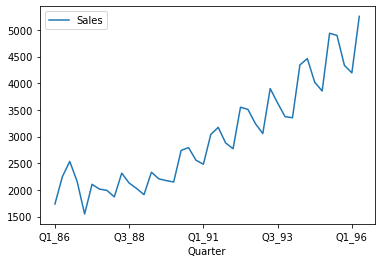

In [42]:
# line plot of time series
from pandas import read_csv
from matplotlib import pyplot
series.plot()
pyplot.show()

array([[<AxesSubplot:title={'center':'Sales'}>]], dtype=object)

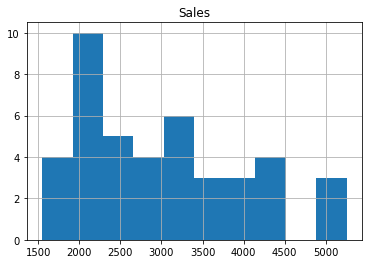

In [43]:
series.hist()

<AxesSubplot:ylabel='Density'>

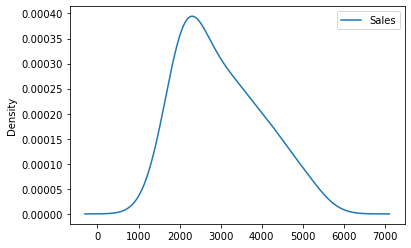

In [44]:
series.plot(kind='kde')

In [45]:
# separate out a validation dataset
split_point = len(series) - 10
dataset, validation = series[0:split_point], series[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('CocaCola_Sales_RawData.csv', header=False)
validation.to_csv('Airlines+Data.csv', header=False)

Dataset 32, Validation 10


# Persistence/ Base model

In [46]:
# evaluate a persistence model
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt
# load data
train = read_csv('Airlines+Data.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = train.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]


In [47]:
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
# observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

>Predicted=3854.000, Expected=4936.000
>Predicted=4936.000, Expected=4895.000
>Predicted=4895.000, Expected=4333.000
>Predicted=4333.000, Expected=4194.000
>Predicted=4194.000, Expected=5253.000
RMSE: 725.128


# ARIMA Hyperparameters

In [48]:
# grid search ARIMA parameters for a time series

import warnings
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt


# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
# prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.50)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
# make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
# model_fit = model.fit(disp=0)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
# calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

# Grid search for p,d,q values

In [49]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [50]:
# load dataset
train = read_csv('Airlines+Data.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# evaluate parameters
#p_values = range(0, 5)
#d_values = range(0, 5)
#q_values = range(0, 5)
warnings.filterwarnings("ignore")
#evaluate_models(train.values, p_values, d_values, q_values)

# Build Model based on the optimized values

In [51]:
# save finalized model to file
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
import numpy

In [52]:
# load data
train = read_csv('CocaCola_Sales_RawData.csv', header=0, index_col=0, parse_dates=True)
# prepare data
X = train.values
X = X.astype('float32')

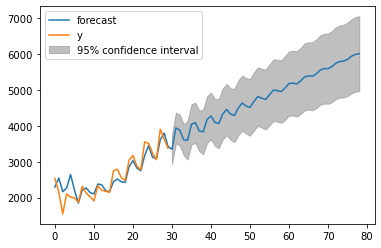

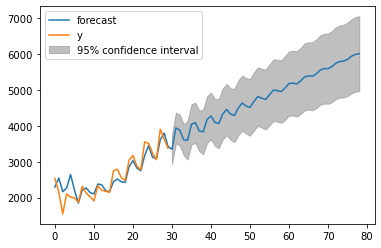

In [53]:
# fit model
model = ARIMA(X, order=(3,1,0))
model_fit = model.fit()
forecast=model_fit.forecast(steps=10)[0]
model_fit.plot_predict(1, 79)

In [54]:
#Error on the test data
val=pd.read_csv('Airlines+Data.csv',header=None)
rmse = sqrt(mean_squared_error(val[1], forecast))
rmse

611.5066321273708

# Combine train and test data and build final model

In [55]:
# fit model
data = read_csv('Airlines+Data.csv', header=0, index_col=0, parse_dates=True)
# prepare data
X = train.values
X = X.astype('float32')

In [56]:
model = ARIMA(X, order=(3,1,0))
model_fit = model.fit()

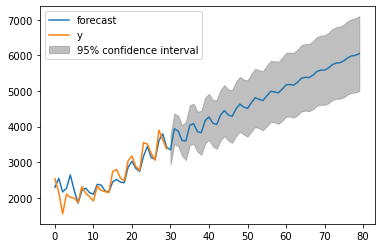

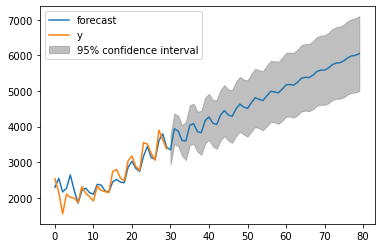

In [57]:
forecast=model_fit.forecast(steps=10)[0]
model_fit.plot_predict(1,80)

In [58]:
forecast

array([3345.57150837, 3938.3006183 , 3875.95649733, 3608.81482833,
       3595.18224942, 4038.08362058, 4081.73419758, 3852.74255342,
       3829.94913368, 4171.48435306])